<a href="https://colab.research.google.com/github/simmy4946/IT-Related/blob/main/config_items_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
config_df= pd.read_csv("/content/configuration_deviation_dataset 2.csv")

In [ ]:
# Check the top 5 heads..
config_df.head(5)

,Site_ID,Configuration_Item,Deviation_Type,Severity,Reported_Date,Status
0,151,Network,Patch Non-Compliant,Medium,01-01-2024,Resolved
1,192,HVAC,Patch Non-Compliant,Low,02-01-2024,Open
2,114,Network,Missing Configuration,High,03-01-2024,Open
3,171,Compute,Performance Degradation,Medium,04-01-2024,Open
4,160,Compute,Under-Provisioned,High,05-01-2024,Open


In [ ]:
# Check the shape the data..
config_df.shape

(1000, 6)

In [ ]:
# Check the size of the data..
config_df.size

6000

In [ ]:
# See the columns of data...
config_df.columns


Index(['Site_ID', 'Configuration_Item', 'Deviation_Type', 'Severity',
       'Reported_Date', 'Status'],
      dtype='object')

In [ ]:
# check dtypes ...
config_df.dtypes

,0
Site_ID,int64
Configuration_Item,object
Deviation_Type,object
Severity,object
Reported_Date,object
Status,object


In [ ]:
# convert the date into date time format...
config_df["Reported_Date"]=pd.to_datetime(config_df["Reported_Date"], format="%d-%m-%Y")


In [ ]:
#config_df["Reported_Date"] = pd.to_datetime(config_df["Reported_Date"], dayfirst=True, errors="coerce")

In [ ]:
config_df.dtypes

,0
Site_ID,int64
Configuration_Item,object
Deviation_Type,object
Severity,object
Reported_Date,datetime64[ns]
Status,object


In [ ]:
# see the summary of data...
config_df.describe(include= 'all')

,Site_ID,Configuration_Item,Deviation_Type,Severity,Reported_Date,Status
count,1000.000000,1000,1000,1000,1000,1000
unique,NaN,4,10,4,NaN,3
top,NaN,Compute,Patch Non-Compliant,Medium,NaN,Open
freq,NaN,399,205,388,NaN,503
mean,149.128000,NaN,NaN,NaN,2025-05-14 12:00:00,NaN
min,100.000000,NaN,NaN,NaN,2024-01-01 00:00:00,NaN
25%,123.000000,NaN,NaN,NaN,2024-09-06 18:00:00,NaN
50%,150.000000,NaN,NaN,NaN,2025-05-14 12:00:00,NaN
75%,174.000000,NaN,NaN,NaN,2026-01-19 06:00:00,NaN
max,199.000000,NaN,NaN,NaN,2026-09-26 00:00:00,NaN


In [ ]:
# check the duplicates are present in the data or not..
config_df.duplicated().any()

False

In [ ]:
# check the null values present in data or not...
config_df.isnull().sum()

,0
Site_ID,0
Configuration_Item,0
Deviation_Type,0
Severity,0
Reported_Date,0
Status,0


**Non Graphical Analysis**

value counts

**What are the counts of unique Site_IDs?**

In [ ]:
config_df['Site_ID'].value_counts().sort_values()

,count
Site_ID,
130,3
110,4
182,4
140,4
190,5
...,...
132,18
198,18
191,19


total number of unique site_ids are 100

**What is the distribution of Configuration_Item types (Compute, Network, HVAC, Generator)?**

In [ ]:
config_df['Configuration_Item'].value_counts().sort_values()

,count
Configuration_Item,
Generator,97
HVAC,197
Network,307
Compute,399


There is distribution of the configuration items--

Network accounts for 30.7%.

HVAC represents 19.7%.

Generator is the least common, at 9.7%.

This distribution shows a heavy emphasis on Compute and Network resources, which together make up over 70% of all configuration items.

**Which Deviation_Type occurs most frequently?**


In [ ]:
config_df['Deviation_Type'].value_counts().sort_values()

,count
Deviation_Type,
Performance Degradation,38
Under-Provisioned,40
Redundant Configuration,55
Unsupported Hardware,60
Version Mismatch,76
Connectivity Issue,97
Over-Provisioned,106
Security Vulnerability,158
Missing Configuration,165


Patch Non-Compliant 205 is mostly occurred

**How many issues are Open, In Progress, and Resolved?**

In [ ]:
config_df['Severity'].value_counts().sort_values()

,count
Severity,
Critical,91
High,209
Low,312
Medium,388


Medium severity is high is numbers with 388 and critical severity cases are low with 91 count.

**What is the proportion of each Severity level (Low, Medium, High, Critical)?**

In [ ]:
config_df['Status'].value_counts().sort_values()

,count
Status,
Resolved,195
In Progress,302
Open,503


Most items are currently Open, followed by In Progress, with the fewest being Resolved.

**How many unique Reported_Date values exist?**




In [ ]:
config_df["Reported_Date"].nunique()


1000

1000 unique reported date values in the data



**Which Deviation_Type is most common for each Severity level?**

In [ ]:
most_com_dev= config_df.groupby("Severity")["Deviation_Type"].value_counts().unstack().idxmax(axis=1)
most_com_dev

,0
Severity,
Critical,Patch Non-Compliant
High,Patch Non-Compliant
Low,Patch Non-Compliant
Medium,Patch Non-Compliant


This shows that all severity levels—Critical, High, Medium, and Low—are marked as Patch Non-Compliant.

Systems across all severity levels are not compliant with patch requirements, indicating a widespread issue with patch management regardless of severity.

**How does the number of Open issues vary across Configuration_Item types?**

In [ ]:
config_df.groupby('Status')['Configuration_Item'].value_counts().unstack()

Configuration_Item,Compute,Generator,HVAC,Network
Status,,,,
In Progress,128,28,52,94
Open,203,51,100,149
Resolved,68,18,45,64


open issues vary across config items as compute is 203 counts , 51 open issues of generators, 100 of HVAC and 149 in numbers of network issues which are open status.

**What percentage of Critical issues are still unresolved?**


In [ ]:
critical_issues=config_df[config_df['Severity']== "Critical"]
critical_issues
unresolved_percentage = (critical_issues["Status"].isin(["Open", "In Progress"]).mean()) * 100
unresolved_percentage

79.12087912087912

The unresolved_percentage gives the percentage of Critical issues that are not yet resolved.
This helps assess how many high-priority issues are still pending action.

**Which month has the highest number of reported deviations?**

In [ ]:
pd.to_datetime(config_df["Reported_Date"], format="%d-%m-%Y")


,Reported_Date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
995,2026-09-22
996,2026-09-23
997,2026-09-24
998,2026-09-25


In [ ]:
extract_high_month= config_df['Reported_Date'].value_counts().idxmax()
extract_high_month

Timestamp('2024-01-01 00:00:00')

January month has the highest number of reported deviations...

In [ ]:
config_df.dtypes

,0
Site_ID,int64
Configuration_Item,object
Deviation_Type,object
Severity,object
Reported_Date,datetime64[ns]
Status,object


**How many configuration deviations are reported per month?**

In [ ]:
pd.to_datetime(config_df["Reported_Date"], dayfirst=True, errors="coerce")


,Reported_Date
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
995,2026-09-22
996,2026-09-23
997,2026-09-24
998,2026-09-25


In [ ]:
#pd.to_datetime(config_df["Reported_Date"], dayfirst=True, errors="coerce")  # Convert to datetime
#config_df = config_df.dropna(subset=["Reported_Date"])  # Remove invalid dates


In [ ]:
monthly_counts = config_df.groupby(config_df["Reported_Date"].dt.month).size()
monthly_counts

,0
Reported_Date,
1,93
2,85
3,93
4,90
5,93
6,90
7,93
8,93
9,86


**Which month has the highest number of reported deviations and the lowest with graphical representation?**


In [ ]:
hig_month= config_df['Reported_Date'].dt.month.value_counts().idxmax()
hig_month

1

In [ ]:
monthly_counts = config_df["Reported_Date"].dt.month.value_counts().sort_index()

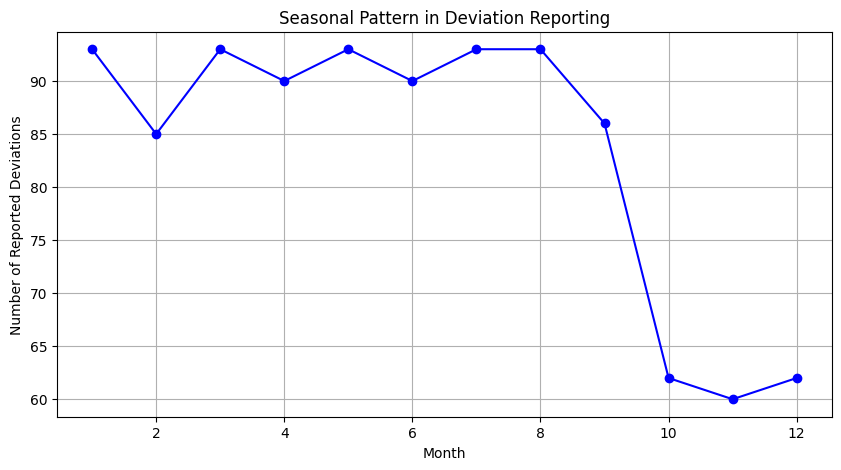

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_counts.index, monthly_counts.values, marker="o", linestyle="-", color="b")
plt.xlabel("Month")
plt.ylabel("Number of Reported Deviations")
plt.title("Seasonal Pattern in Deviation Reporting")
plt.grid(True)

January has the highest number of reported deviations and the lowest in december.

**Are there seasonal trends in deviations for different Configuration_Item types?**

<Figure size 1200x600 with 0 Axes>

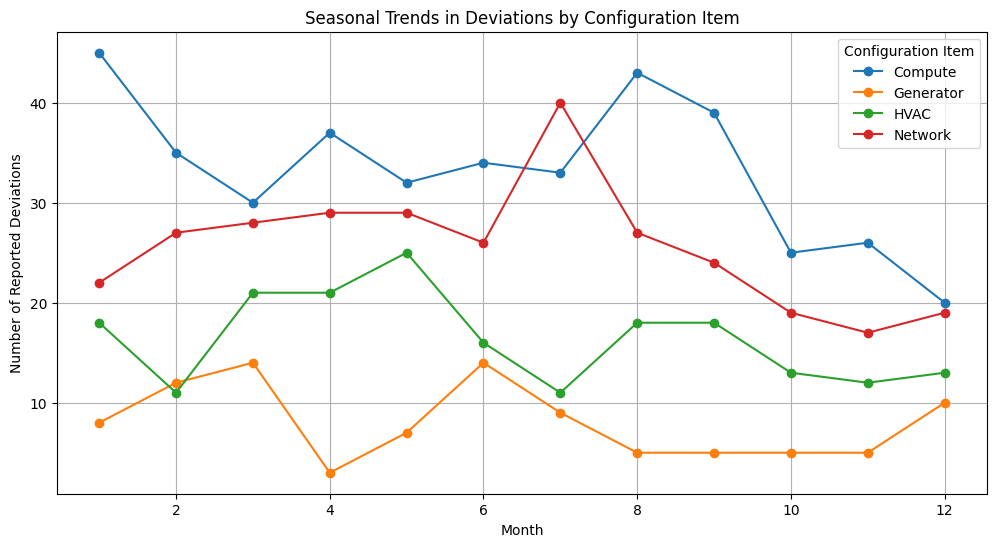

In [ ]:
monthly_trends = config_df.groupby([config_df["Reported_Date"].dt.month, "Configuration_Item"]).size().unstack()
plt.figure(figsize=(12, 6))
monthly_trends.plot(marker="o", linestyle="-", figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Number of Reported Deviations")
plt.title("Seasonal Trends in Deviations by Configuration Item")
plt.legend(title="Configuration Item")
plt.grid(True)

insights:  HVAC is not peak on summer month, it is reported 25 deviations on may month,compute deviations are higher on august means 8th month of year however, network deviations are exact 40 on second highest peak of 7th or july month, generators devaitions found in march and june month and no issue has been traced in winter month except decemeber month with little deviation reported with value 10.

**What proportion percentage of issues are related to Patch Non-Compliant?**

In [ ]:
patch_issues = config_df[config_df['Deviation_Type']=='Patch Non-Compliant'].count() #shape[0] in place of count()
patch_issues

,0
Site_ID,205
Configuration_Item,205
Deviation_Type,205
Severity,205
Reported_Date,205
Status,205


In [ ]:
total_issues=config_df['Deviation_Type'].shape[0] # or total_issues = len(df)

In [ ]:
patch_proportion= patch_issues/total_issues*100
patch_proportion

,0
Site_ID,20.5
Configuration_Item,20.5
Deviation_Type,20.5
Severity,20.5
Reported_Date,20.5
Status,20.5


patch proportion percentage of issues is 20.5 for each.

**Which Deviation_Type has the highest percentage of Critical issues?**

In [ ]:
tot_per_deviation= config_df['Deviation_Type'].value_counts()

In [ ]:
critical_per_deviation= config_df[config_df['Severity'] == "Critical"]['Deviation_Type'].value_counts()

In [ ]:
critical_per = (critical_per_deviation)/(tot_per_deviation)*100
critical_per

,count
Deviation_Type,
Connectivity Issue,8.247423
Missing Configuration,7.878788
Over-Provisioned,12.264151
Patch Non-Compliant,9.268293
Performance Degradation,5.263158
Redundant Configuration,9.090909
Security Vulnerability,6.329114
Under-Provisioned,17.500000
Unsupported Hardware,6.666667


In [ ]:
critical_per.idxmax()

'Under-Provisioned'

Under-Provisioned has the highest percentage of critical issues with 17.
Under-Provisioned is the Deviation_Type most commonly associated with Critical issues, contributing the highest percentage of all Critical severity cases.

This indicates that resource shortages—such as insufficient compute, storage, or network capacity—pose the greatest operational risk. These issues can lead to system slowdowns, outages, or failures, directly affecting performance and availability.

Immediate action should be taken to:

Analyze affected systems,

Allocate adequate resources, and

Prevent performance bottlenecks or service disruption.

Prioritizing this deviation type can significantly reduce overall critical risk in the infrastructure.

**How many sites have repeated deviations over time?**

In [ ]:
counts= config_df.groupby('Site_ID')['Deviation_Type'].nunique()
counts

,Deviation_Type
Site_ID,
100,8
101,7
102,7
103,5
104,7
...,...
195,6
196,6
197,5


In [ ]:
repeated_sites = (counts > 1).sum()
repeated_sites

100

100 sites have repeated deviations

**Is there a significant imbalance in the Configuration_Item distribution**

In [ ]:
config_counts = config_df["Configuration_Item"].value_counts()

In [ ]:
config_percentage = (config_counts / config_counts.sum()) * 100
config_percentage

,count
Configuration_Item,
Compute,39.9
Network,30.7
HVAC,19.7
Generator,9.7


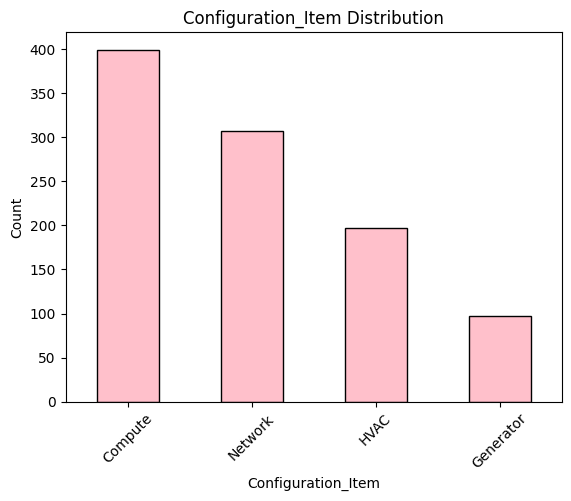

In [ ]:
config_counts.plot(kind="bar", color="pink", edgecolor="black")
plt.title("Configuration_Item Distribution")
plt.xlabel("Configuration_Item")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

**Is the Severity distribution skewed towards a particular level?**

insights: distribution is highly skewed toward the particular level of severity with Medium , Most reported deviations are classified as Medium severity.
These issues are not urgent but require attention (e.g., outdated configurations, minor misconfigurations) but  Low Severity (Second Highest) → Second Bar

Many issues fall under Low severity, meaning they have minimal impact on operations.
Examples: Minor warnings, slight deviations in HVAC settings, or non-critical software patches.
3️.High Severity (Third Highest) → Third Bar

Fewer deviations are classified as High severity.
These issues significantly impact operations but may not cause immediate failure.
Example: A network redundancy failure that has a backup but still poses a risk.
4. Critical Severity (Least Frequent) → Smallest Bar (Right Tail)

Very few issues are Critical, which means these incidents are rare but severe.
Examples: Major system failures, security breaches, data loss, generator failure in a critical site.
Since Critical issues are rare, the graph has a long right tail, making it right-skewed.
it shows a right-skewed (positively skewed) distribution, meaning most severity levels are on the lower side, and fewer issues are critical.


**what is the count of severity and their percentage with graphical representation?**

In [ ]:
No_of_severity= config_df['Severity'].value_counts() # or we can do normalize= True
No_of_severity

,count
Severity,
Medium,388
Low,312
High,209
Critical,91


In [ ]:
severity_percentage= (No_of_severity/No_of_severity.sum()) * 100
severity_percentage

,count
Severity,
Medium,38.8
Low,31.2
High,20.9
Critical,9.1


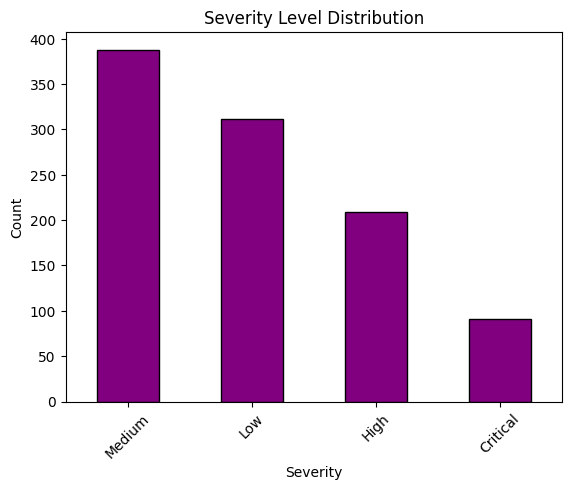

In [ ]:
No_of_severity.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Severity Level Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

It is showing each severity level and its percentage share of the total. This helps prioritize attention based on how frequent each severity is in the data

**Do all sites have at least one reported deviation?**

In [ ]:
site_deviation_counts = config_df['Site_ID'].value_counts()


In [ ]:
at_least_one_deviation= site_deviation_counts.min()>0
at_least_one_deviation


True

yes, all sites have at least one reported deviation.

**Unbalanced Data Investigation Is there a significant imbalance in the Configuration_Item distribution?**

In [ ]:
config_item_counts = config_df['Configuration_Item'].value_counts(normalize = True)*100
config_item_counts.to_frame().reset_index()

,Configuration_Item,proportion
0,Compute,39.9
1,Network,30.7
2,HVAC,19.7
3,Generator,9.7


There is number of configuration item is maximum of compute with 39.9 or 40 value , and network is second most is with value 30 count and generator has a very less count with only 9.7 .

In [ ]:
#config_item_counts= site_deviation_counts.max()>50
#config_item_counts


graphical representation of configuration item distribution..

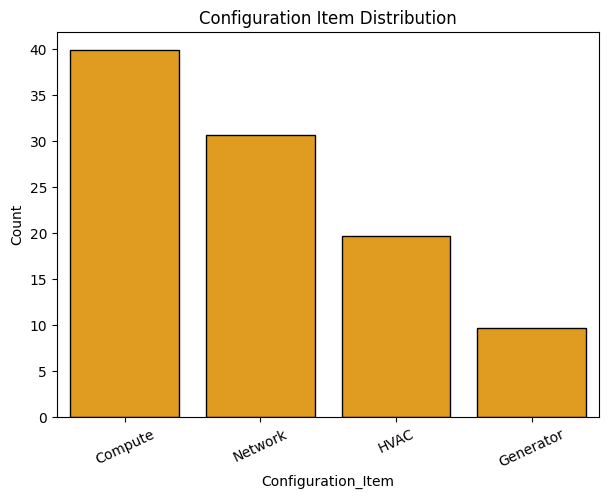

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=config_item_counts.index, y=config_item_counts.values, color="orange", edgecolor="black")

plt.title("Configuration Item Distribution")
plt.xlabel("Configuration_Item")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.show()

**OUTLIERS..**

In [ ]:
Q1 = config_item_counts.quantile(0.25)
Q3 = config_item_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

15.8

Outliers detection for this data is concerning because of this multiple categorical values , there is no integer values to finding the insights of outliers, however, we applied methods for showing how to make findings about that we would have the multiple integers values.

In [ ]:
outliers = config_item_counts[config_item_counts > (Q3 + 1.5 * IQR)]
outliers # there is float so cant find

,proportion
Configuration_Item,


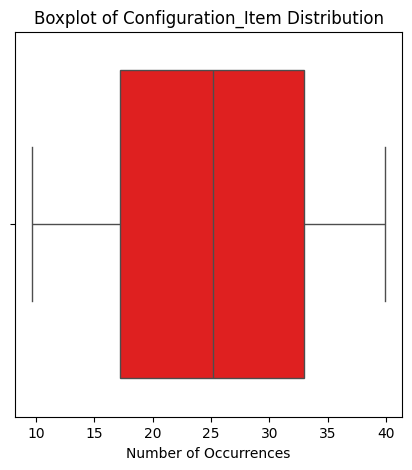

In [ ]:
config_item_counts = config_df["Configuration_Item"].value_counts()

plt.figure(figsize=(5,5))
sns.boxplot(x=config_item_counts, color="red")
plt.title("Boxplot of Configuration_Item Distribution")
plt.xlabel("Number of Occurrences")
plt.show()

In [ ]:
#critical_per = (critical_per_deviation)/(tot_per_deviation)*100
#critical_per.reset_index().sort_values(by="Severity",ascending=True)

In [9]:
#monthly_counts =config_df["Reported_Date"].dt.month.value_counts().sort_index()

# Plot the bar chart
#plt.figure(figsize=(10,5))
#plt.bar(monthly_counts.index, monthly_counts.values, color="gray")

# Labels & title
#plt.xlabel("Month")
#plt.ylabel("Number of Reported Deviations")
#plt.title("Deviation Count Per Month")
#plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
#plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
#plt.show()